## Модель

Как мы с вами обсудили на лекции -- одним из основных блоков программы для обучения нейронных сетей является *описание модели*.

Что такое модель? Вне зависимости от используемого фреймворка, это блок кода, который показывает нашей программе как исходные признаки должны быть преобразованы в предсказания модели. 

А вот само определение модели зависит от фреймворка и каждый из них предлагает свою структуру (правила) описания моделей (которые сейчас становятся все более похожи друг на друга). Структура необходима для того, чтобы фреймворк мог построить вычислительный граф и мог правильно считать его производные.

## Keras API для Tensorflow

Изучение Tensorflow мы начнем сразу с высокоуровневого интерфейса Keras, который считается основным интерфейсом для реализации нейронных сетей в tensorflow и с недавних пор является его частью. Теоретически, все, что мы будем делаем можно реализовать без использования Keras, но в таком случае нам придется писать и тестировать большое количество самописных классов и функций, что не является целью данного блока


## Модель в Keras

 Модель в Keras -- это объект класса **tf.keras.Model**

In [2]:
import tensorflow as tf
#tf.enable_eager_execution()

In [3]:
model = tf.keras.Model()
type(model)

tensorflow.python.keras.engine.training.Model

In [4]:
tf.keras.Model?
"`Model` groups layers into an object with training and inference features."

'`Model` groups layers into an object with training and inference features.'

Из документации видно, что модель -- работает со слоями. Что же такое слой? Если смотреть на модель как на конструктор, то слой -- это кубик.

Другими словами слой -- это слой нейронной сети. Их типов существует [очень много](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Но на данный момент мы знаем только один слой -- полносвязный. Давайте посмотрим, как его определить в Keras.


### Полносвязный слой
Полносвязный слой в Tensorflow называется Dense и живет в tensorflow.keras.layers.

In [5]:
from tensorflow.keras.layers import Dense
import numpy as np
#Dense?

Он имеет следующие параметры (показаны лишь самые основные):

```
Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', ...)
```


*   units -- количество нейронов на выходе из слоя
*   activation -- функция активации, например "sigmoid", "relu", "softmax". по умолчанию -- слой без активации
*   use_bias -- применять ли bias 
*   kernel_initializer и bias_initializer -- правила инициализации матрицы весов (kernel) и баеса. Это часто используемые значения "по-умолчанию". Скорее всего вам не придется их никогда менять)

Обратите внимание в этом списке нет "количества нейронов на входе". В keras необходимо указывать количество входных нейронов только в первом слое сети. В остальных он посчитает самостоятельно -- ведь, количество входных нейронов в слой, должно быть равно количеству выходных нейронов на предыдущем слое. 

В первом слое размер входа указывается через input_shape. 

Рассмотрим пример ниже. В нем мы “применим” слой к инпуту x. Для применения слоя нужно вызвать его метод `__call__` , который вызывается когда аргумент передается в скобках, это мы делаем в третьей строчке.


In [6]:
x = np.ones((4, 3)) # 4 объекта, 3 признака

dense_layer = Dense(units=2, input_shape=(3,))
output = dense_layer(x)
print(f"Output: {output}")

Output: [[0.5480154 0.6411339]
 [0.5480154 0.6411339]
 [0.5480154 0.6411339]
 [0.5480154 0.6411339]]


In [7]:
w, b = dense_layer.get_weights() 
print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: [[ 0.03349829  0.04344189]
 [ 0.81194365 -0.25094795]
 [-0.29742652  0.84863997]]
Bias: [0. 0.]


In [8]:
manual_output = np.matmul(x, w) + b
print(f"Manual output: {manual_output}")

Manual output: [[0.54801542 0.6411339 ]
 [0.54801542 0.6411339 ]
 [0.54801542 0.6411339 ]
 [0.54801542 0.6411339 ]]


In [9]:
x = np.ones((4, 3))
dense_layer = Dense(2, input_shape=(3,), use_bias=False) # можно инициализировать слой без баеса
output = dense_layer(x)
print(dense_layer.get_weights())

[array([[-0.14239335,  0.1781038 ],
       [ 0.07322311,  0.2860273 ],
       [-1.09041   ,  0.4251814 ]], dtype=float32)]


## Sequential Model
А как же нам "прицепить" один слой к другому? Самый простой способ это сделать -- класс Sequential. Он может быть использован в подавляющем большинстве случаев. Как следует из названия -- он последовательно применяет один слой за другим.

In [11]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(10,), activation="relu")) # скрытый слой 1
model.add(Dense(20, activation="relu", 
                bias_initializer=tf.keras.initializers.Constant(2.0))) # скрытый слой 2, с не дефолтной инициализацией
model.add(Dense(5, activation="softmax")) # выходной слой

In [12]:
sample_input = np.random.rand(2, 10)
output = model(sample_input)

print(output)

tf.Tensor(
[[2.5007498e-04 7.9701640e-02 8.9073420e-01 1.3723774e-02 1.5590372e-02]
 [1.8457499e-04 5.2714370e-02 9.2884171e-01 9.5332647e-03 8.7261926e-03]], shape=(2, 5), dtype=float32)


In [13]:
print(output.numpy().sum(1)) # на выходе -- софтмакс, значит сумма == 1

[1.0000001 1.0000001]


In [14]:
# проверим как инициализирован второй скрытый слой 
# для этого обратимся к нему с помощью:
model.layers[1].get_weights()[1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.], dtype=float32)

Есть очень удобная функция, которая подскажет сколько в нашей модели параметров, и какие размерности получены на промежуточных слоях -- model.summary()

In [15]:
model.summary() # None обозначает, что размер батча может быть произвольный

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 105       
Total params: 435
Trainable params: 435
Non-trainable params: 0
_________________________________________________________________


In [16]:
# если не указать размер инпута в первом слое, то summary не сработает
model_no_input = tf.keras.Sequential()
model_no_input.add(Dense(10, activation="relu")) # скрытый слой 1 
model_no_input.add(Dense(20, activation="relu"))
model_no_input.add(Dense(5, activation="softmax")) # выходной слой

model_no_input.summary() # None обозначает, что размер батча может быть произвольный

ValueError: ignored

Или для еще более наглядного представления -- tf.keras.utils.plot_model()

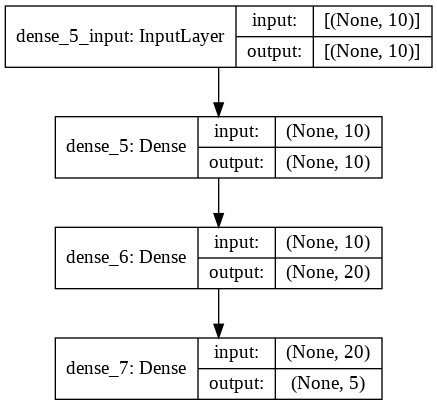

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Functional API
Но с помощью Sequential можно представить ограниченное (хоть и часто достаточное на практике) множество моделей. Представьте, что вам пригодилось реализовать такую модель:

<img src="https://drive.google.com/uc?export=view&id=1-1Bltu3VDEDbTl0liRmfs5Dr3r5NzBCR" width=600>

Реализовать такую модель с помощью Sequential нельзя. Но здесь к нам на помощь приходит Functional API.

Для понимания Functional API нужно начать относится к сети как к графу. В таком случае вершины -- слои, а ребра связывают выход одного слоя с входом другого. Иллюстрация выше как раз поможет это сделать.

Определять слои в коде мы уже умеем, теперь нужно научиться "рисовать стрелки". Для того чтобы это сделать нужно просто применить один слой к выходу другого! Рассмотрим пример ниже.

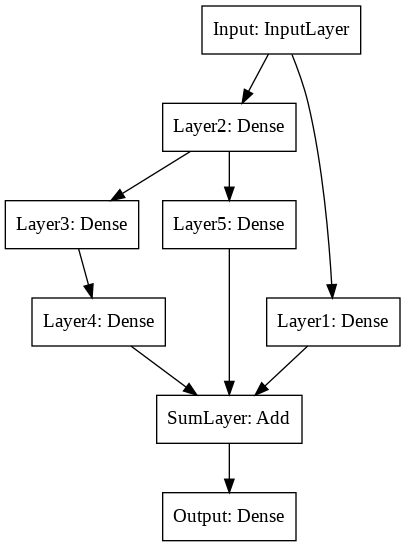

In [18]:
# cпециальный Инпут слой, показывает keras куда "положить" данные при использовании модели
input_layer = tf.keras.layers.Input(shape=(10, ), name="Input") 
l1 = Dense(10, name="Layer1") # определили первый слой
l1_output = l1(input_layer) # соеденили его с инпутом, "нарисовали" самую правую стрелку на картинке выше

l2_output = Dense(10, name="Layer2")(input_layer) # дальше будем определять чуть компактнее
l3_output = Dense(10, name="Layer3")(l2_output)
l4_output = Dense(10, name="Layer4")(l3_output)

l5_output = Dense(10, name="Layer5")(l2_output)

# специальный слой, который сложит выходы всех слоев, которые ему передали
sum_output = tf.keras.layers.Add(name="SumLayer")([l1_output, l4_output, l5_output])

# выходной слой
output = Dense(10, name="Output")(sum_output)

# создаем модель. нужно показать что мы считаем входом в нашу модель, а что выходом.
model = tf.keras.Model(inputs=input_layer, outputs=output)

tf.keras.utils.plot_model(model, show_shapes=False)

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 10)]         0                                            
__________________________________________________________________________________________________
Layer2 (Dense)                  (None, 10)           110         Input[0][0]                      
__________________________________________________________________________________________________
Layer3 (Dense)                  (None, 10)           110         Layer2[0][0]                     
__________________________________________________________________________________________________
Layer1 (Dense)                  (None, 10)           110         Input[0][0]                      
____________________________________________________________________________________________

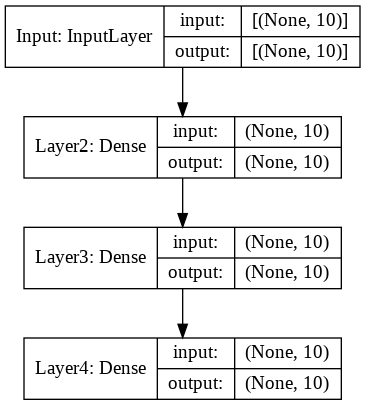

In [20]:
# если мы укажем в аутпутах слой, для вычисления которого не нужно было считать весь граф -- 
# keras автоматически обрежет граф. 
model = tf.keras.Model(inputs=input_layer, outputs=l4_output)

tf.keras.utils.plot_model(model, show_shapes=True)

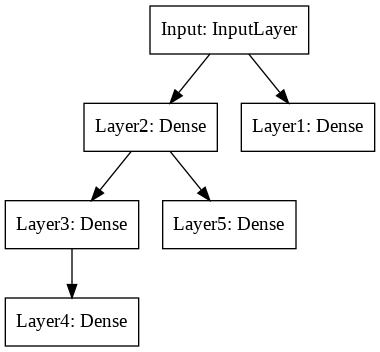

In [ ]:
# можно указать несколько выходов
model = tf.keras.Model(inputs=input_layer, outputs=[l4_output, l5_output, l1_output])

tf.keras.utils.plot_model(model, show_shapes=False)

## Заключение

Мы познакомились с одним из самых главных объектов в Keras -- модель. И сделали первый шаг -- научились ее определять. 

Теперь вам не составит труда построить модель самостоятельно по ее описанию. Именно это вы и попробуете сделать на [практике](https://colab.research.google.com/drive/1OFKvrSYHU71O68uXcunQtTFJE4sLZW6E). 

А как только вы почувствуете себя уверенно, мы перейдем к самому интересному -- обучению модели.

